In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('..\exercise\data\skull.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Sobel Operators
sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=3)

(Text(0.5, 1.0, 'Sobel Y'), ([], []), ([], []))

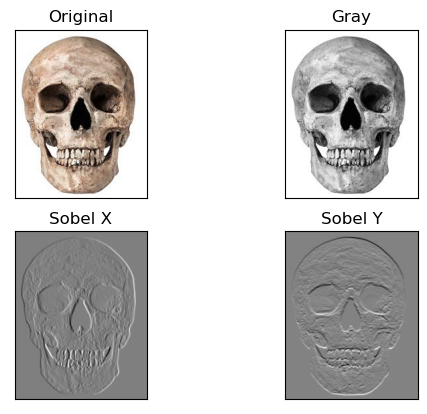

In [4]:
plt.subplot(2,2,1),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(gray,cmap = 'gray')
plt.title('Gray'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

In [5]:
!cv2.Sobel?

Docstring:
Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]) -> dst
.   @brief Calculates the first, second, third, or mixed image derivatives using an extended Sobel operator.
.   
.   In all cases except one, the \f$\texttt{ksize} \times \texttt{ksize}\f$ separable kernel is used to
.   calculate the derivative. When \f$\texttt{ksize = 1}\f$, the \f$3 \times 1\f$ or \f$1 \times 3\f$
.   kernel is used (that is, no Gaussian smoothing is done). `ksize = 1` can only be used for the first
.   or the second x- or y- derivatives.
.   
.   There is also the special value `ksize = #FILTER_SCHARR (-1)` that corresponds to the \f$3\times3\f$ Scharr
.   filter that may give more accurate results than the \f$3\times3\f$ Sobel. The Scharr aperture is
.   
.   \f[\vecthreethree{-3}{0}{3}{-10}{0}{10}{-3}{0}{3}\f]
.   
.   for the x-derivative, or transposed for the y-derivative.
.   
.   The function calculates an image derivative by convolving the image with the appropriat

(Text(0.5, 1.0, 'orientation'), ([], []), ([], []))

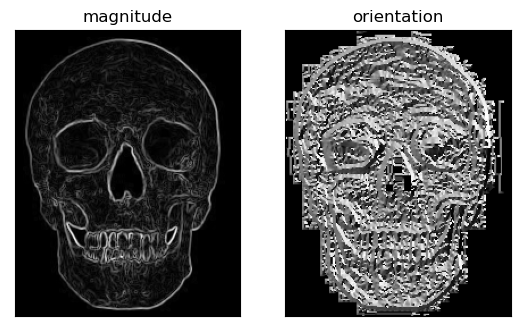

In [9]:
# calculate gradient magnitude and orientation
gMag = (sobelx**2 + sobely**2)**0.5
orien = cv2.phase(np.array(sobelx, np.float64), np.array(sobely, np.float64), angleInDegrees = True)

plt.subplot(1,2,1),plt.imshow(gMag,cmap = 'gray')
plt.title('magnitude'), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2),plt.imshow(orien,cmap = 'gray')
plt.title('orientation'), plt.xticks([]), plt.yticks([])

In [11]:
# map the orientation using 4 colors for visualization
orienMap = np.zeros((orien.shape[0], orien.shape[1], 3), dtype=np.int32)

# Define RGB
red = np.array([255, 0, 0])
cyan = np.array([0, 255, 255])
green = np.array([0, 255, 0])
yellow = np.array([255, 255, 0])

# set colors corresponding to angles
for i in range(0, orienMap.shape[0]):
    for j in range(0, orienMap.shape[1]):
        if orien[i, j] < 90.0:
            orienMap[i, j, :] = red
        elif orien[i, j] < 180.0:
            orienMap[i, j, :] = cyan
        elif orien[i, j] < 270.0:
            orienMap[i, j, :] = green
        elif orien[i, j] < 360.0:
            orienMap[i, j, :] = yellow

plt.figure()
plt.subplot(1,2,1),plt.imshow(gMag,cmap = 'gray')
plt.title('magnitude'), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2),plt.imshow(orienMap)
plt.title('orientation'), plt.xticks([]), plt.yticks([])

SyntaxError: unexpected EOF while parsing (3802559488.py, line 12)